In [1]:
from src.utils import get_device, seed_everything

seed_everything()

device = get_device()
print("Using device:", device)

Using device: cuda


In [2]:
import os

from src.model import build_model
from src.utils import load_model

num_classes = len(os.listdir("../data/processed/train"))
model = build_model(num_classes)

model = load_model(model, "../saved_models/eye_disease_cnn.pth", device)

[INFO] Model loaded from ../saved_models/eye_disease_cnn.pth


In [3]:
import torch
from src.data_prep import get_dataloaders
from src.train import validate_one_epoch

_, val_loader = get_dataloaders("../data/processed", batch_size=32)

criterion = torch.nn.CrossEntropyLoss()
val_loss, val_acc = validate_one_epoch(model, val_loader, device, criterion)

print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_acc:.2f}%")

Val Loss: 0.3845
Val Accuracy: 86.69%


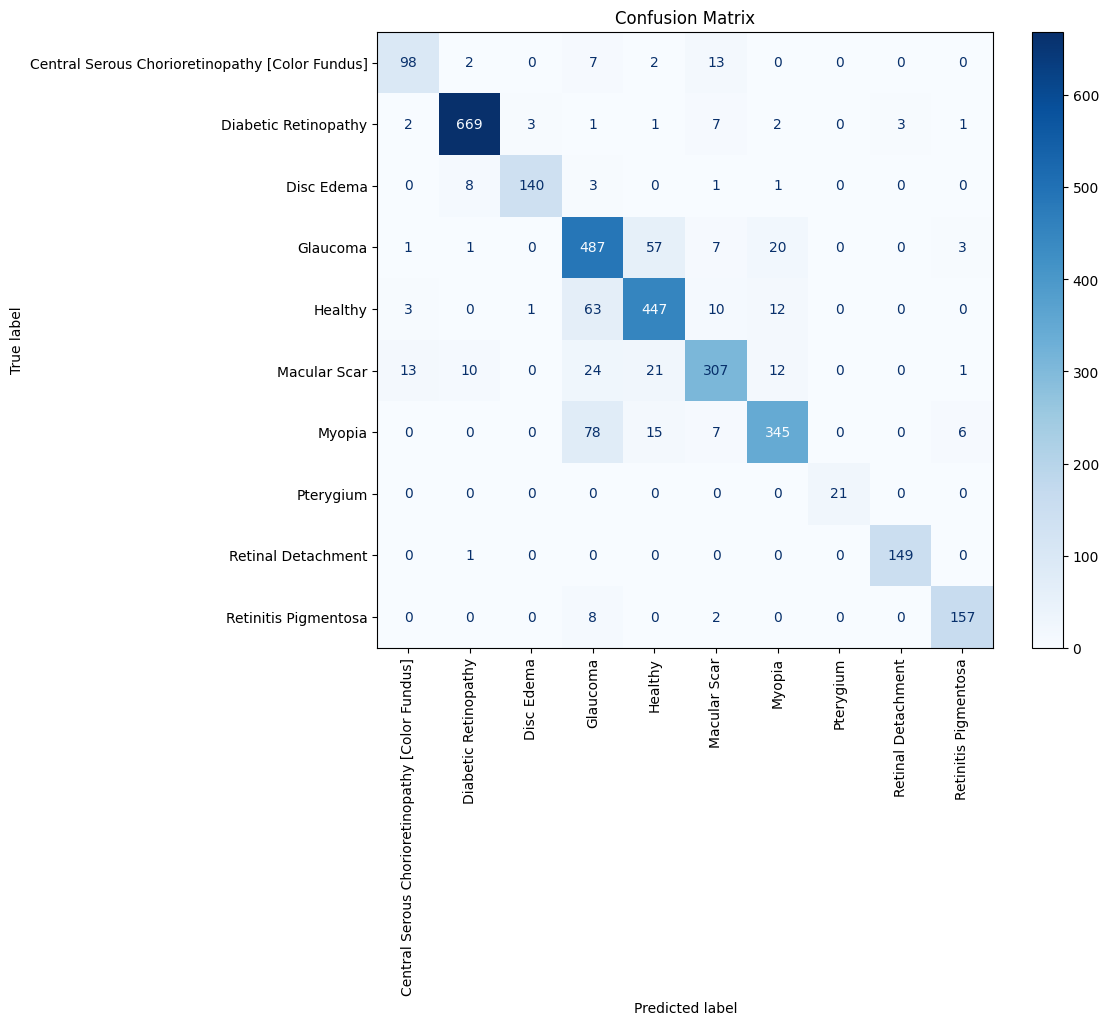

In [4]:
from src.utils import plot_confusion_matrix

class_names = sorted(os.listdir("../data/processed/train"))
plot_confusion_matrix(model, val_loader, device, class_names)

In [5]:
from src.utils import get_classification_report

get_classification_report(model, val_loader, device, class_names)

                                                 precision    recall  f1-score   support

Central Serous Chorioretinopathy [Color Fundus]       0.84      0.80      0.82       122
                           Diabetic Retinopathy       0.97      0.97      0.97       689
                                     Disc Edema       0.97      0.92      0.94       153
                                       Glaucoma       0.73      0.85      0.78       576
                                        Healthy       0.82      0.83      0.83       536
                                   Macular Scar       0.87      0.79      0.83       388
                                         Myopia       0.88      0.76      0.82       451
                                      Pterygium       1.00      1.00      1.00        21
                             Retinal Detachment       0.98      0.99      0.99       150
                           Retinitis Pigmentosa       0.93      0.94      0.94       167

                   